## Import Dependencie

In [275]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [276]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [277]:
# check shape
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 284807 rows and 31 columns


In [278]:
# check some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Check missing data

In [279]:
# check null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

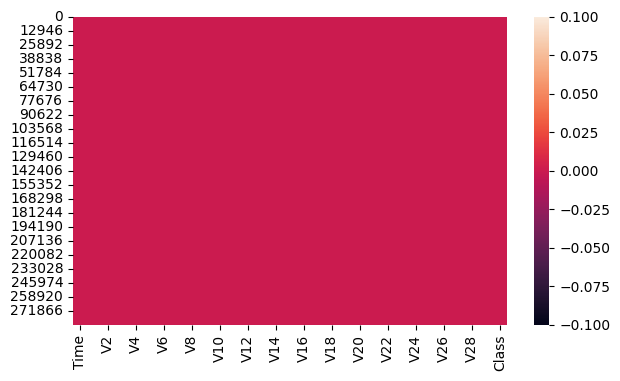

In [280]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

In [281]:
# check description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check unbalanced data

In [282]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Around 75% or more of classes are=0, what means that the data is unbalanced

In [283]:
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the data')

Frauds 0.173 % of the data


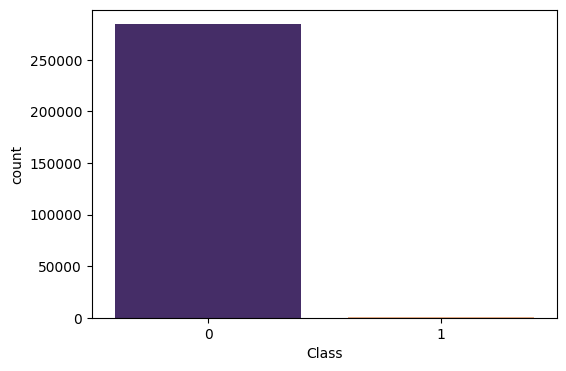

In [284]:
# visualize 'Class' values
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette=['#432371',"#FAAE7B"]);

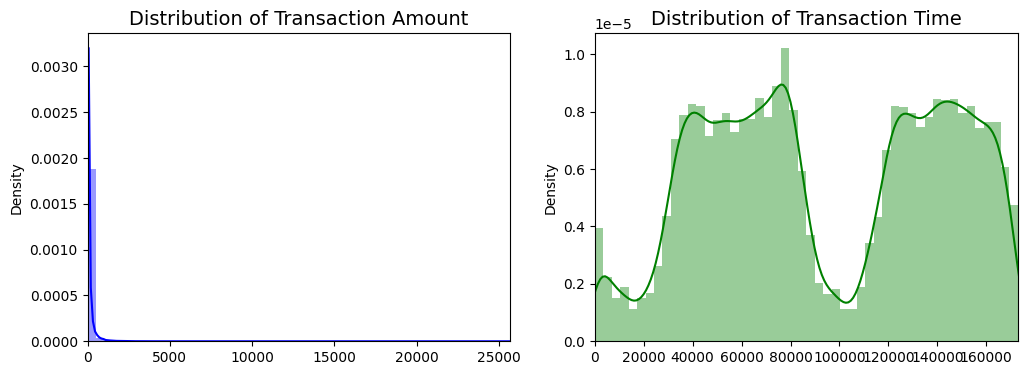

In [285]:
# comparing the distribution of Transaction Amount and Transaction Time
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
amount_val = df["Amount"].values
time_val = df["Time"].values

# visualize Distribution of Transaction Amount
sns.distplot(amount_val, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# visualize Distribution of Transaction Time
sns.distplot(time_val, ax=ax[1], color="green")
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show();

**If we use this data for our predictive models we might get errors and our algorithms will probably overfit because it peopably assume that most transactions are not fraud.**

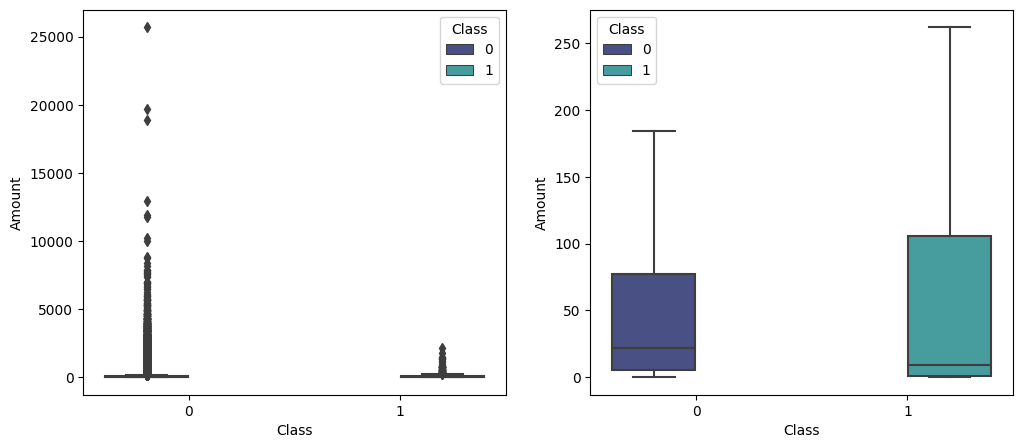

In [286]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))
s = sns.boxplot(ax=ax0, x="Class", y="Amount", hue="Class", data=df, palette="mako", showfliers=True)
s = sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df, palette="mako", showfliers=False)
plt.show();

## Visualize correlations

In [287]:
# correlations
corr = df.corr()

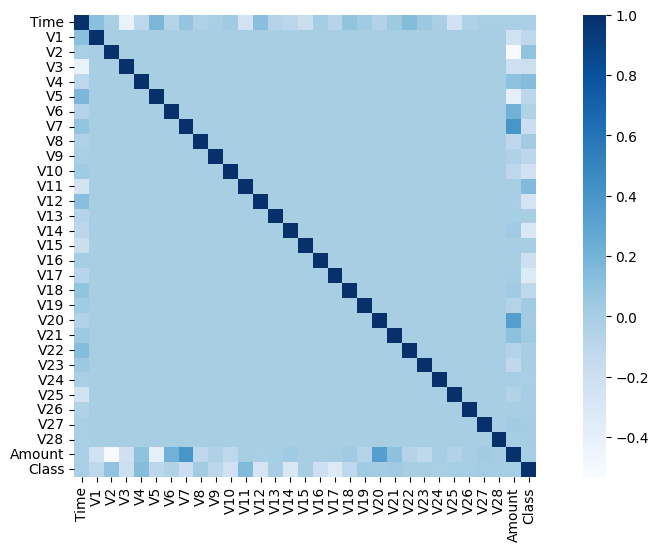

In [288]:
# visualize correlations
plt.figure(figsize=(12,6))
sns.heatmap(corr, square=True, annot_kws={'size':15}, cmap ='Blues');


**We will build a sample data containing similar distribution of normal transactions, and getting a non fraud sample that equals to the fraud to make the data balanced.**

## Build a sample dataset

In [289]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [290]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [291]:
legit_sample = non_fraud.sample(492)

In [292]:
# Check Shape of our Labels
print(legit_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


## Creating balanced data

In [293]:
balanced_df = pd.concat([legit_sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264202,161316.0,-1.834646,0.836599,-1.777191,-1.385531,1.217880,-0.488019,2.335031,-0.814653,0.405667,...,-0.087070,0.901651,-0.275935,0.288873,-0.090961,0.031079,0.195364,0.457551,183.33,0
5592,5750.0,1.300039,0.415242,0.465646,0.698622,-0.083917,-0.640067,0.017873,-0.304371,1.230313,...,-0.430833,-0.949709,0.076498,-0.156772,0.290918,0.083981,-0.050567,0.009366,1.29,0
259211,159015.0,-0.052749,0.761016,0.252458,-0.552882,0.377246,-1.068593,1.183329,-0.258467,-0.164636,...,-0.223487,-0.517825,0.170977,0.053160,-0.447495,0.134038,0.235395,0.102887,46.28,0
37731,39081.0,-0.416293,1.191808,0.489448,1.134850,0.274880,0.276252,0.289337,0.551412,-0.941364,...,0.225479,0.721467,-0.090799,-0.273811,-0.515914,-0.245443,0.109525,0.119623,6.00,0
161680,114417.0,2.049220,0.059555,-1.788613,0.254021,0.528658,-0.442404,0.034484,-0.039505,0.343932,...,-0.335419,-0.924131,0.307716,0.239293,-0.278827,0.170351,-0.070707,-0.044402,0.89,0


In [294]:
balanced_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

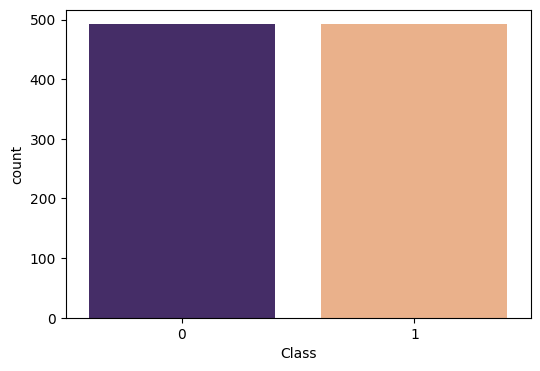

In [295]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=balanced_df, palette=['#432371',"#FAAE7B"]);

In [296]:
balanced_df.groupby('Class').describe()

Time                                                                   \
       count          mean           std    min       25%      50%        75%   
Class                                                                           
0      492.0  97369.617886  48793.221641  204.0  57142.25  97728.5  142678.75   
1      492.0  80746.806911  47835.365138  406.0  41241.50  75568.5  128483.00   

                    V1            ...       V28           Amount              \
            max  count      mean  ...       75%       max  count        mean   
Class                             ...                                          
0      172264.0  492.0  0.006599  ...  0.071095  2.327028  492.0   88.517541   
1      170348.0  492.0 -4.771948  ...  0.381152  1.779364  492.0  122.211321   

                                                          
              std  min     25%     50%      75%      max  
Class                                                     
0      241.764877  0.0  4.9575  19.715   65.005  2090.50  
1      256.683288  0.0  1.0000   9.250  105.890  2125.87  

[2 rows x 240 columns]

In [297]:
# new correlations
corr_balaced = balanced_df.corr()

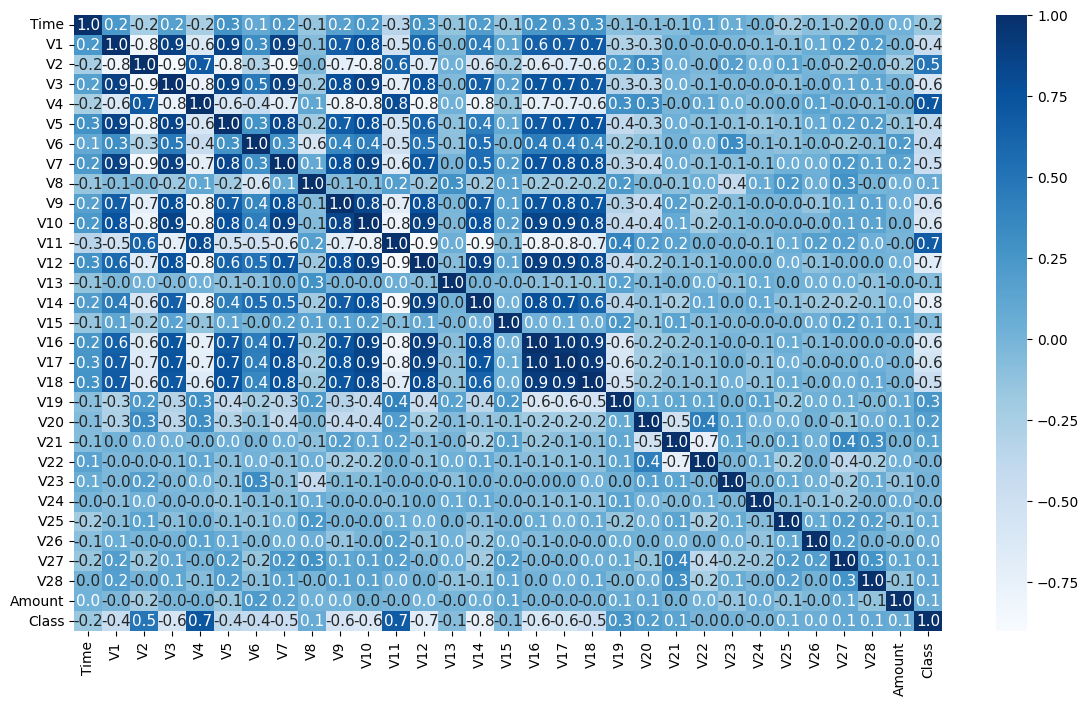

In [298]:
# visualize correlations
plt.figure(figsize=(14,8))
sns.heatmap(corr_balaced, fmt = '.1f', annot = True, annot_kws={'size':11}, cmap ='Blues');

## Feature Scaling


In [299]:
scaler = StandardScaler()
balanced_df['Amount_scaled'] = scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['Time_scaled'] = scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df = balanced_df.drop(columns=["Amount", "Time"], axis=1)

## Feature Engineering


In [300]:
FEATURES = [col for col in balanced_df.columns if col not in ['Class']]
balanced_df["mean"] = balanced_df[FEATURES].mean(axis=1)
balanced_df["std"] = balanced_df[FEATURES].std(axis=1)
balanced_df["min"] = balanced_df[FEATURES].min(axis=1)
balanced_df["max"] = balanced_df[FEATURES].max(axis=1)

In [301]:
balanced_df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,Amount_scaled,Time_scaled,mean,std,min,max
264202,-1.834646,0.836599,-1.777191,-1.385531,1.217880,-0.488019,2.335031,-0.814653,0.405667,1.258886,...,0.031079,0.195364,0.457551,0,0.312298,1.475314,0.079636,0.920415,-1.834646,2.335031
5592,1.300039,0.415242,0.465646,0.698622,-0.083917,-0.640067,0.017873,-0.304371,1.230313,-0.461294,...,0.083981,-0.050567,0.009366,0,-0.416879,-1.700935,0.088709,0.897971,-1.831782,2.926245


## Feature Selection

In [302]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

## Splitting the data into Training and Testing Data

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [304]:
print(f"Train data is : {len(X_train)} \nTest data is : {len(X_test)}")

Train data is : 738 
Test data is : 246


## Base Line Model

### RandomForest Classifier

In [305]:
RF_clf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 4,
    min_samples_split = 5,
    n_jobs = 4,
    random_state = 40,
    n_estimators = 100
)

RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_jobs=4,
                       random_state=40)

In [306]:
y_pred = RF_clf.predict(X_test)

## Feature Importance
**Using RandomForestClassifier**

In [307]:
features = ['Time_scaled','Amount_scaled', 'mean', 'std', 'min', 'max', 'V1', 'V2', 'V3', 'V4', 'V5',
            'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

target = 'Class'

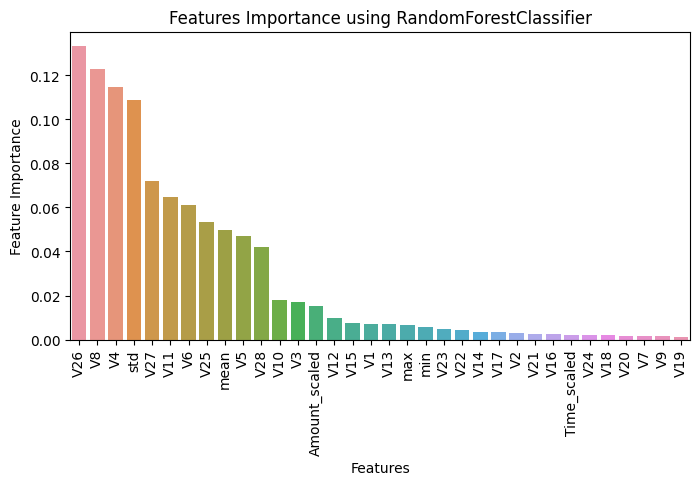

In [308]:
imp_fea = pd.DataFrame({'Features': features, 'Feature Importance': RF_clf.feature_importances_})
imp_fea = imp_fea.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize = (8,4))
plt.title('Features Importance using RandomForestClassifier', fontsize=12)
s = sns.barplot(x='Features', y='Feature Importance', data=imp_fea)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

## Model Evaluation

In [309]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       123
           1       0.98      0.93      0.96       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



<Axes: >

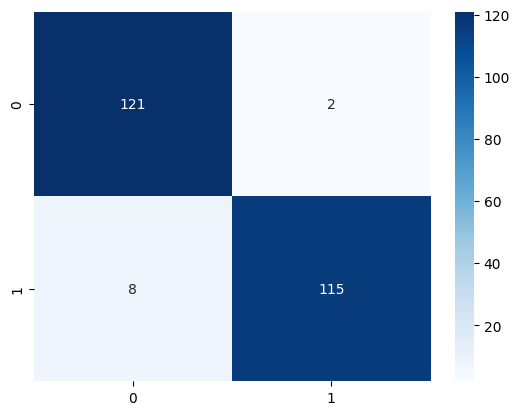

In [310]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

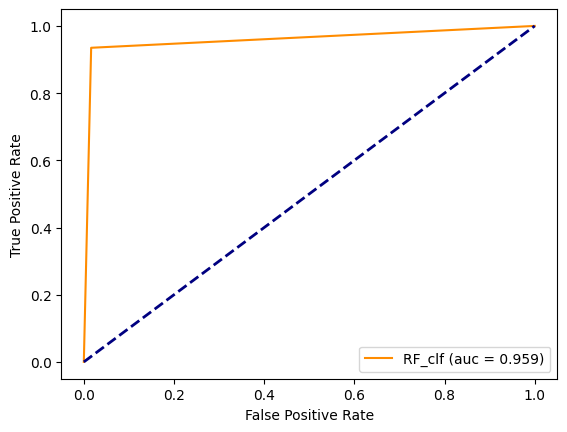

In [311]:
# Roc and auc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_s = auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", label=f'RF_clf (auc = %0.3f)' % auc_s)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [312]:
finding best params
forest = RandomForestClassifier()
params = {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'n_estimators': [70, 100, 150, 200, 250, 300],
              'max_depth' : [4, 8, 10, 20, 30, None],
              'min_samples_split' :[5, 10, 20, 50, 100, 150, 200],

        }
CV_rfc = GridSearchCV(estimator=forest, param_grid=params, cv= 5)
CV_rfc.fit(X_train, y_train)

In [313]:
CV_rfc.best_params_

### AdaBoost Classifier

In [314]:
Ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
Ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [315]:
y_pred_Ada = Ada_clf.predict(X_test)

In [316]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred_Ada)
print(f"Accuracy: {accuracy:.2f}")

# classification report
report = classification_report(y_test, y_pred_Ada)
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       123
           1       0.98      0.96      0.97       123

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246



<Axes: >

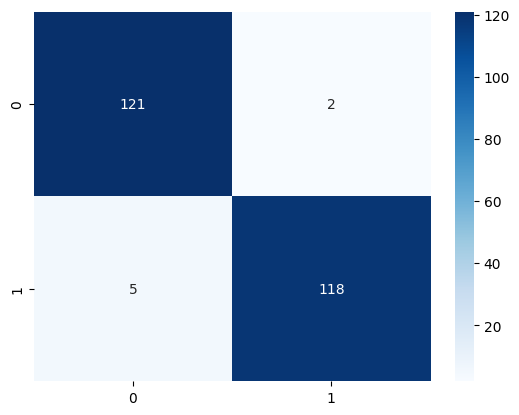

In [317]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_Ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

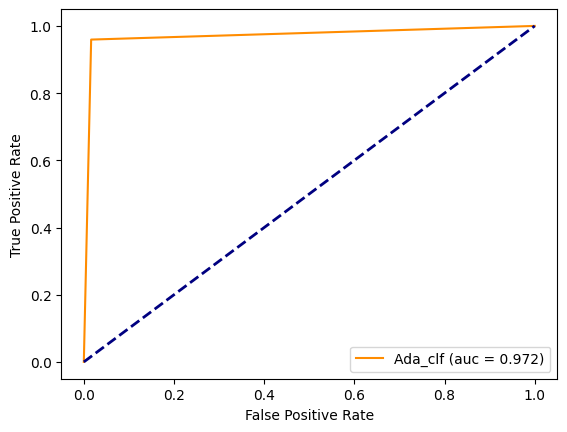

In [318]:
# Roc and auc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_Ada)
auc_s = auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", label=f'Ada_clf (auc = %0.3f)' % auc_s)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()